<a href="https://colab.research.google.com/github/plance17/Aprendizaje-de-Maquina/blob/master/Teor%C3%ADa_3_Ejercicio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import scipy
import math
import pandas as pd 
from scipy import linalg, optimize
from sympy.solvers import solve
from sympy import Symbol

from sklearn import neighbors
from sklearn import metrics
import sklearn

import array as arr
# realizar solicitudes web desde una URL
import requests

import urllib.request 

# xlrd nos ayuda a extraer datos de hojas de cálculo de Excel (.xls y .xlsx)
# https://xlrd.readthedocs.io/en/latest/
from xlrd import open_workbook

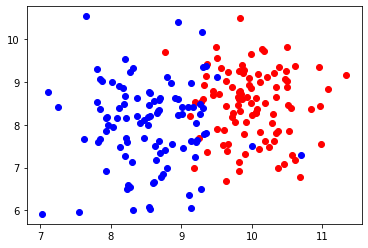

In [ ]:
mu_a=10.0
sigma_a=0.5

a=np.random.normal(mu_a,sigma_a,size=100)
data_a=np.zeros(a.size)

for i in np.arange(0,a.size):
  data_a[i]=1/(sigma_a * np.sqrt(2 * np.pi)) *np.exp( - (a[i] - mu_a)**2 / (2 * sigma_a**2))

a_ajuste = np.linspace(7.5,12.5)
ajuste_gaussiano_a = 1/(sigma_a*np.sqrt(2*np.pi))*np.exp(-(a_ajuste-mu_a)**2/(2*sigma_a**2))

mu_b=8.5
sigma_b=0.75

b=np.random.normal(mu_b,sigma_b,size=100)
data_b=np.zeros(b.size)

for i in np.arange(0,a.size):
  data_b[i]=1/(sigma_b * np.sqrt(2 * np.pi)) *np.exp( - (b[i] - mu_b)**2 / (2 * sigma_b**2))

b_ajuste = np.linspace(6.5,12.5)
ajuste_gaussiano_b = 1/(sigma_b*np.sqrt(2*np.pi))*np.exp(-(b_ajuste-mu_b)**2/(2*sigma_b**2))
umbral=9

'''
plt.plot(a,data_a,'bo')
plt.plot(a_ajuste,ajuste_gaussiano_a,'blue')
plt.plot(b,data_b,'ro')
plt.plot(b_ajuste,ajuste_gaussiano_b,'red')
plt.show()
'''

mu_c=8.5
sigma_c=0.6

c=np.random.normal(mu_c,sigma_c,size=100)
data_c=np.zeros(c.size)

for i in np.arange(0,c.size):
  data_c[i]=1/(sigma_c * np.sqrt(2 * np.pi)) *np.exp( - (c[i] - mu_c)**2 / (2 * sigma_c**2))

c_ajuste = np.linspace(6.5,12.5)
ajuste_gaussiano_c = 1/(sigma_c*np.sqrt(2*np.pi))*np.exp(-(c_ajuste-mu_c)**2/(2*sigma_c**2))

mu_d=8.0
sigma_d=1.0

d=np.random.normal(mu_d,sigma_d,size=100)
data_d=np.zeros(d.size)

for i in np.arange(0,d.size):
  data_d[i]=1/(sigma_d * np.sqrt(2 * np.pi)) *np.exp( - (d[i] - mu_d)**2 / (2 * sigma_d**2))

d_ajuste = np.linspace(4.5,12.5)
ajuste_gaussiano_d = 1/(sigma_d*np.sqrt(2*np.pi))*np.exp(-(d_ajuste-mu_d)**2/(2*sigma_d**2))
umbral=9

plt.plot(a,b,'ro')
plt.plot(c,d,'bo')
plt.show()


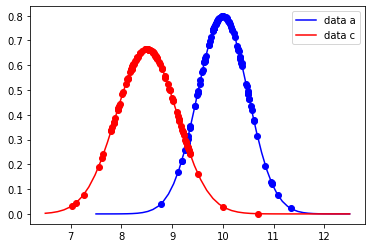

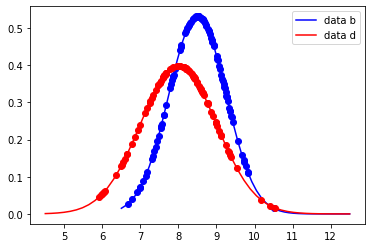

In [ ]:
plt.plot(a,data_a,'bo')
plt.plot(a_ajuste,ajuste_gaussiano_a,'blue',label='data a')
plt.plot(c,data_c,'ro')
plt.plot(c_ajuste,ajuste_gaussiano_c,'red',label='data c')
plt.legend(loc='upper right')
plt.show()

plt.plot(b,data_b,'bo')
plt.plot(b_ajuste,ajuste_gaussiano_b,'blue',label='data b')
plt.plot(d,data_d,'ro')
plt.plot(d_ajuste,ajuste_gaussiano_d,'red',label='data d')
plt.legend(loc='upper right')
plt.show()

In [ ]:
mean_a=np.mean(a)
mean_b=np.mean(b)
mean_c=np.mean(c)
mean_d=np.mean(d)

print(mean_a,mean_b,mean_c,mean_d)

9.990684088979988 8.490525345555202 8.550492345604122 8.004913279335932


In [ ]:
#Matriz de covarianza
def distribution_a(x):
  return 1/(sigma_a*np.sqrt(2*np.pi))*np.exp(-(x-mu_a)**2/(2*sigma_a**2))
def distribution_b(x):
  return 1/(sigma_b*np.sqrt(2*np.pi))*np.exp(-(x-mu_b)**2/(2*sigma_b**2))
def distribution_c(x):
  return 1/(sigma_c*np.sqrt(2*np.pi))*np.exp(-(x-mu_c)**2/(2*sigma_c**2))
def distribution_d(x):
  return 1/(sigma_d*np.sqrt(2*np.pi))*np.exp(-(x-mu_d)**2/(2*sigma_d**2))

E_ab=np.zeros((2,2))

for i in np.arange(0,a.size):
  E_ab[0,0]=E_ab[0,0]+(a[i]-mean_a)**2  #Componente xx de la matriz de covarianza
  E_ab[0,1]=E_ab[0,1]+(a[i]-mean_a)*(b[i]-mean_b)   #Componente xy de la matriz de covarianza
  E_ab[(1,0)]=E_ab[(1,0)]+(b[i]-mean_b)*(a[i]-mean_a)   #Componente yx de la matriz de covarianza
  E_ab[(1,1)]=E_ab[(1,1)]+(b[i]-mean_b)**2  #Componente yy de la matriz de covarianza

E_ab=E_ab/a.size

print(E_ab)

[[ 0.2212966  -0.01559042]
 [-0.01559042  0.63383695]]


El conjunto A y B lo tomo como 0, y el conjunto C y D los tomo como 1

In [ ]:
#Creo la matrix t, que tendrá 200 filas(2*a.size) y tres columnas
#Las primeras 100 filas corresponden a los datos x,y de las distribuciones a y b, y su tercer columna serán todos 0, número que representa a este conjunto
#Las últimas 100 filas corresponden a los datos x,y de las distribuciones c y d, y su tercer columna serán todos 1, número que representa a este conjunto
t=np.asarray(np.zeros((2*a.size,3)))

for i in np.arange(0,a.size):
  t[i,0]=a[i]
  t[i,1]=b[i]
  t[i,2]=0

for i in np.arange(a.size,2*a.size):
  t[i,0]=c[i-a.size]
  t[i,1]=d[i-a.size]
  t[i,2]=1

Paso la tabla de un array a un DataFrame

In [ ]:
#Transformo la matriz de arrays en una de DataFrame, es mas fácil para trabajarla
data = pd.DataFrame(t,columns= ['x_position','y_position','class'])
print(data.x_position)
print(data.iloc[:,0:2])

0       9.807001
1      10.063705
2      10.682931
3      10.338609
4      10.108146
         ...    
195     9.347071
196     7.853862
197     8.543230
198     8.123555
199     8.616964
Name: x_position, Length: 200, dtype: float64
     x_position  y_position
0      9.807001    8.459050
1     10.063705    8.635349
2     10.682931    6.785022
3     10.338609    8.655608
4     10.108146    7.442560
..          ...         ...
195    9.347071    7.819682
196    7.853862    7.662860
197    8.543230    8.476224
198    8.123555    8.910658
199    8.616964    8.564887

[200 rows x 2 columns]


Entreno el sistema de predicción. Dividio mi conjunto de datos en train(generan las predicciones) y test(testean lo predicho)

In [ ]:
x_train, x_test, y_train, y_test=sklearn.model_selection.train_test_split(data.iloc[:,0:2],data.iloc[:,2], test_size=0.4,random_state=10)


Grafico los resultados obtenidos en un mapa de predicciones. k=1, número de vecinos mas cercanos igual a uno

Text(0.5, 1.0, 'Knn neighbors --- k=1')

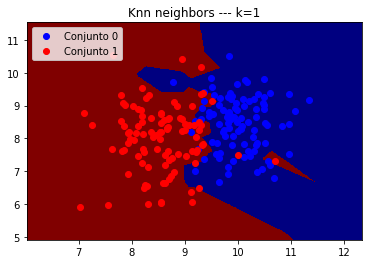

In [ ]:
#Número de vecinos mas cercanos y entrenamiento del sistema
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

h = .01  # step size in the mesh

x_min, x_max = t[:,0].min() - 1, t[:,0].max() + 1
y_min, y_max =t[:,1].min() - 1, t[:,1].max() + 1

#Creo la tabla de grillado para luego pintarla con las predicciones
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
z=knn.predict(np.c_[xx.ravel(),yy.ravel()])

cmap_dos_colores=ListedColormap(['red','blue'])
z = z.reshape(xx.shape)


plt.figure()
plt.pcolormesh(xx, yy, z, cmap='jet')
plt.plot(a,b,'bo',label='Conjunto 0')
plt.plot(c,d,'ro',label='Conjunto 1')
plt.legend(loc='upper left')
plt.title('Knn neighbors --- k=1')


Pruebo con número de vecinos mas cercanos igual a 3

k=3

Text(0.5, 1.0, 'Knn neighbors --- k=3')

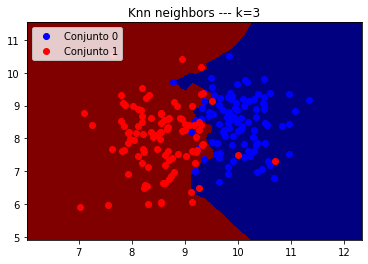

In [ ]:
#Número de vecinos mas cercanos y entrenamiento del sistema
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

h = .01  # step size in the mesh

x_min, x_max = t[:,0].min() - 1, t[:,0].max() + 1
y_min, y_max =t[:,1].min() - 1, t[:,1].max() + 1

#Creo la tabla de grillado para luego pintarla con las predicciones
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
z=knn.predict(np.c_[xx.ravel(),yy.ravel()])

cmap_dos_colores=ListedColormap(['red','blue'])
z = z.reshape(xx.shape)


plt.figure()
plt.pcolormesh(xx, yy, z, cmap='jet')
plt.plot(a,b,'bo',label='Conjunto 0')
plt.plot(c,d,'ro',label='Conjunto 1')
plt.legend(loc='upper left')
plt.title('Knn neighbors --- k=3')

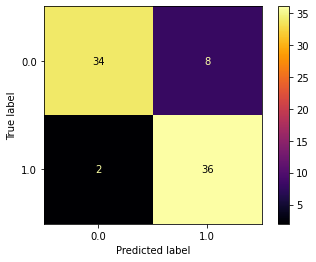

In [ ]:
disp = metrics.plot_confusion_matrix(knn, x_test, y_test, cmap='inferno')


k= 1


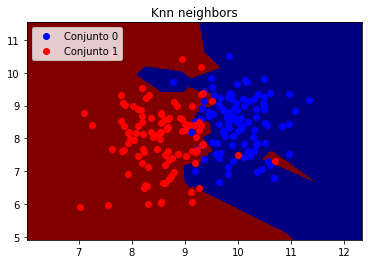

Sensibilidad: 0.9444444444444444
Presicion: 0.8095238095238095
Exactitud: 0.875
Fall_out: 0.18181818181818182

k= 2


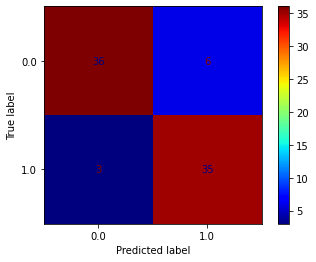

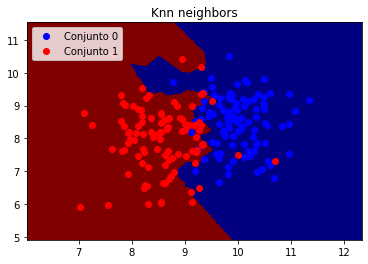

Sensibilidad: 0.9230769230769231
Presicion: 0.8571428571428571
Exactitud: 0.8875
Fall_out: 0.14634146341463414

k= 3


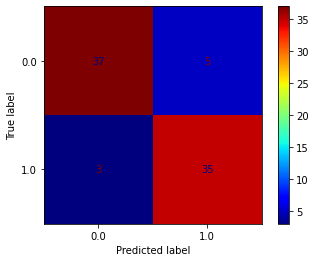

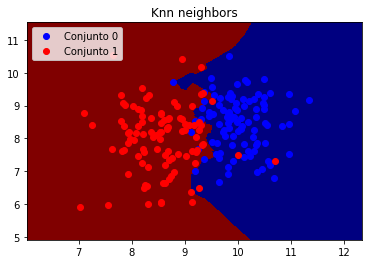

Sensibilidad: 0.925
Presicion: 0.8809523809523809
Exactitud: 0.9
Fall_out: 0.125

k= 4


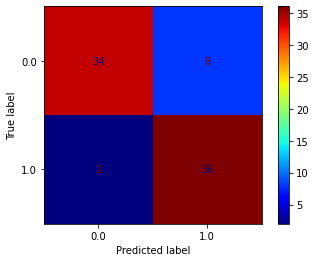

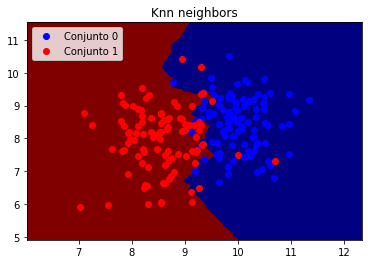

Sensibilidad: 0.9444444444444444
Presicion: 0.8095238095238095
Exactitud: 0.875
Fall_out: 0.18181818181818182

k= 5


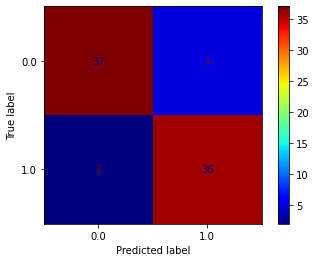

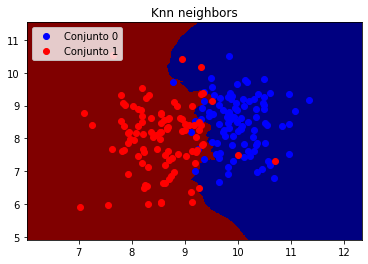

Sensibilidad: 0.9487179487179487
Presicion: 0.8809523809523809
Exactitud: 0.9125
Fall_out: 0.12195121951219512


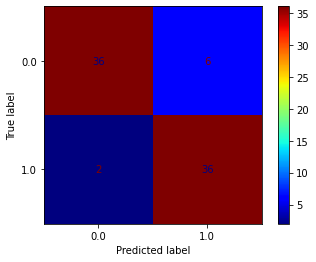

In [ ]:
for i in np.arange(1,6):
  knn = neighbors.KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  print('')
  print('k=',i)

  z=knn.predict(np.c_[xx.ravel(),yy.ravel()])

  cmap_dos_colores=ListedColormap(['red','blue'])
  z = z.reshape(xx.shape)


  plt.figure()
  plt.pcolormesh(xx, yy, z, cmap='jet')
  plt.plot(a,b,'bo',label='Conjunto 0')
  plt.plot(c,d,'ro',label='Conjunto 1')
  plt.legend(loc='upper left')
  plt.title('Knn neighbors')
  plt.show()
  if i==1:
    disp.figure_.suptitle("Confusion Matrix first colomap")
  elif i==3:
    disp.figure_.suptitle("Confusion Matrix second colormap")
  else:
    disp.figure_.suptitle("Confusion Matrix")
  #True Positive Rate
  sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

  #Positive Predicted Value
  presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

  #Accuracy
  exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

  #False Positive Rate
  fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])

  print('Sensibilidad:', sensibilidad)
  print('Presicion:', presicion)
  print('Exactitud:', exactitud)
  print('Fall_out:', fall_out)
  disp = metrics.plot_confusion_matrix(knn, x_test, y_test, cmap='jet')

Alguno puntos no parecen cumplir la condición de vecinos mas cercanos. Esto debe deberse a que los puntos que deberían prevalecer no son parte del grupo train, entonces no se consideran para entrenar el sistema

Sensibilidad: 0.9473684210526315
Presicion: 0.8571428571428571
Exactitud: 0.9
Fall_out: 0.14285714285714285


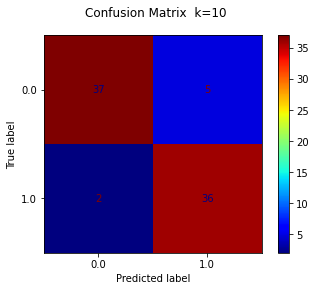

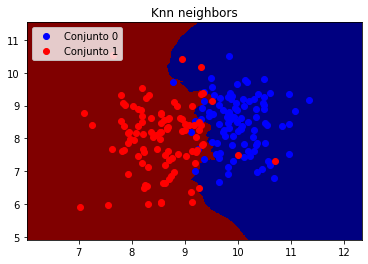

In [ ]:
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

#True Positive Rate
sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

#Positive Predicted Value
presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

#Accuracy
exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

#False Positive Rate
fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])

print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)
disp = metrics.plot_confusion_matrix(knn, x_test, y_test, cmap='jet')
disp.figure_.suptitle("Confusion Matrix  k=10")


plt.figure()
plt.pcolormesh(xx, yy, z, cmap='jet')
plt.plot(a,b,'bo',label='Conjunto 0')
plt.plot(c,d,'ro',label='Conjunto 1')
plt.legend(loc='upper left')
plt.title('Knn neighbors')
plt.show()

Para el caso de k=5 el valor de sensibilidad, precisión y exactitud son ambos "altos", comparando con valores para otros k. 
Para k=10, la presición y exactitud son menores que para el caso de k=5. La única diferencia entre datos es que para k=10 hay un falso positivo menos, y por lo tanto un verdadero positivo mas.

Ahora pruebo cambiando el número de puntos que utilizo para hacer el train

In [ ]:
print(disp.confusion_matrix)
print(disp.confusion_matrix[0,1])
print(disp.confusion_matrix[1,0])

[[37  5]
 [ 2 36]]
5
2


Primer gáfico y tabla
Sensibilidad: 0.922077922077922
Presicion: 0.7553191489361702
Exactitud: 0.8388888888888889
Fall_out: 0.22330097087378642

Segundo gráfico y tabla
Sensibilidad: 0.9565217391304348
Presicion: 0.9565217391304348
Exactitud: 0.95
Fall_out: 0.058823529411764705


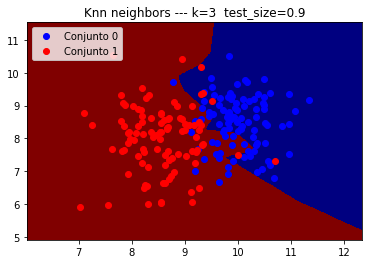

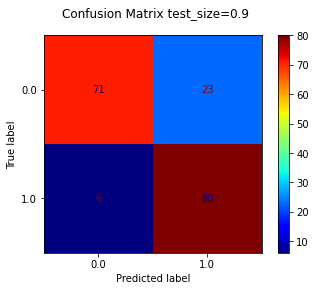

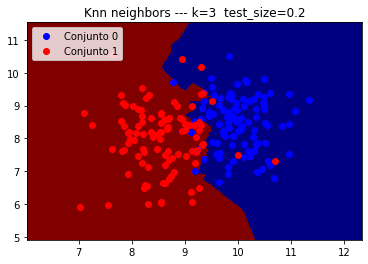

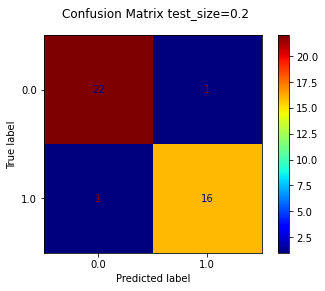

In [ ]:
h = .01  # step size in the mesh

x_min, x_max = t[:,0].min() - 1, t[:,0].max() + 1
y_min, y_max =t[:,1].min() - 1, t[:,1].max() + 1

#Creo la tabla de grillado para luego pintarla con las predicciones
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


#-----------------------------------------------------------------------------------------------
x_train, x_test, y_train, y_test=sklearn.model_selection.train_test_split(data.iloc[:,0:2],data.iloc[:,2], test_size=0.9,random_state=1)

#Número de vecinos mas cercanos y entrenamiento del sistema
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)


z=knn.predict(np.c_[xx.ravel(),yy.ravel()])

cmap_dos_colores=ListedColormap(['red','blue'])
z = z.reshape(xx.shape)


plt.figure()
plt.pcolormesh(xx, yy, z, cmap='jet')
plt.plot(a,b,'bo',label='Conjunto 0')
plt.plot(c,d,'ro',label='Conjunto 1')
plt.legend(loc='upper left')
plt.title('Knn neighbors --- k=3  test_size=0.9')

disp = metrics.plot_confusion_matrix(knn, x_test, y_test, cmap='jet')
disp.figure_.suptitle("Confusion Matrix test_size=0.9")

#True Positive Rate
sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

#Positive Predicted Value
presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

#Accuracy
exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

#False Positive Rate
fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])

print('Primer gáfico y tabla')
print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)
print('')


#--------------------------------------------------------------------------------------------------
x_train, x_test, y_train, y_test=sklearn.model_selection.train_test_split(data.iloc[:,0:2],data.iloc[:,2], test_size=0.2,random_state=1)

#Número de vecinos mas cercanos y entrenamiento del sistema
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)


z=knn.predict(np.c_[xx.ravel(),yy.ravel()])

cmap_dos_colores=ListedColormap(['red','blue'])
z = z.reshape(xx.shape)


plt.figure()
plt.pcolormesh(xx, yy, z, cmap='jet')
plt.plot(a,b,'bo',label='Conjunto 0')
plt.plot(c,d,'ro',label='Conjunto 1')
plt.legend(loc='upper left')
plt.title('Knn neighbors --- k=3  test_size=0.2')

disp = metrics.plot_confusion_matrix(knn, x_test, y_test, cmap='jet')
disp.figure_.suptitle("Confusion Matrix test_size=0.2")


#True Positive Rate
sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

#Positive Predicted Value
presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

#Accuracy
exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

#False Positive Rate
fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])

print('Segundo gráfico y tabla')
print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)

**Distribuciones de datos mas similares**

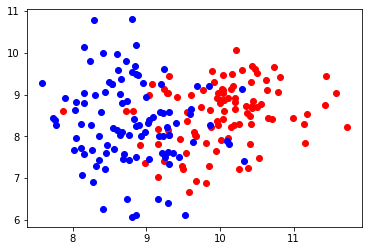

In [ ]:
mu_a=10.0
sigma_a=0.75

a=np.random.normal(mu_a,sigma_a,size=100)
data_a=np.zeros(a.size)

for i in np.arange(0,a.size):
  data_a[i]=1/(sigma_a * np.sqrt(2 * np.pi)) *np.exp( - (a[i] - mu_a)**2 / (2 * sigma_a**2))

a_ajuste = np.linspace(7.5,12.5)
ajuste_gaussiano_a = 1/(sigma_a*np.sqrt(2*np.pi))*np.exp(-(a_ajuste-mu_a)**2/(2*sigma_a**2))

mu_b=8.5
sigma_b=0.75

b=np.random.normal(mu_b,sigma_b,size=100)
data_b=np.zeros(b.size)

for i in np.arange(0,a.size):
  data_b[i]=1/(sigma_b * np.sqrt(2 * np.pi)) *np.exp( - (b[i] - mu_b)**2 / (2 * sigma_b**2))

b_ajuste = np.linspace(6.5,12.5)
ajuste_gaussiano_b = 1/(sigma_b*np.sqrt(2*np.pi))*np.exp(-(b_ajuste-mu_b)**2/(2*sigma_b**2))
umbral=9

'''
plt.plot(a,data_a,'bo')
plt.plot(a_ajuste,ajuste_gaussiano_a,'blue')
plt.plot(b,data_b,'ro')
plt.plot(b_ajuste,ajuste_gaussiano_b,'red')
plt.show()
'''

mu_c=8.75
sigma_c=0.6

c=np.random.normal(mu_c,sigma_c,size=100)
data_c=np.zeros(c.size)

for i in np.arange(0,c.size):
  data_c[i]=1/(sigma_c * np.sqrt(2 * np.pi)) *np.exp( - (c[i] - mu_c)**2 / (2 * sigma_c**2))

c_ajuste = np.linspace(6.5,12.5)
ajuste_gaussiano_c = 1/(sigma_c*np.sqrt(2*np.pi))*np.exp(-(c_ajuste-mu_c)**2/(2*sigma_c**2))

mu_d=8.3
sigma_d=1.0

d=np.random.normal(mu_d,sigma_d,size=100)
data_d=np.zeros(d.size)

for i in np.arange(0,d.size):
  data_d[i]=1/(sigma_d * np.sqrt(2 * np.pi)) *np.exp( - (d[i] - mu_d)**2 / (2 * sigma_d**2))

d_ajuste = np.linspace(4.5,12.5)
ajuste_gaussiano_d = 1/(sigma_d*np.sqrt(2*np.pi))*np.exp(-(d_ajuste-mu_d)**2/(2*sigma_d**2))
umbral=9

plt.plot(a,b,'ro')
plt.plot(c,d,'bo')
plt.show()


In [ ]:
for i in np.arange(0,a.size):
  t[i,0]=a[i]
  t[i,1]=b[i]
  t[i,2]=0

for i in np.arange(a.size,2*a.size):
  t[i,0]=c[i-a.size]
  t[i,1]=d[i-a.size]
  t[i,2]=1


data = pd.DataFrame(t,columns= ['x_position','y_position','class'])

x_train, x_test, y_train, y_test=sklearn.model_selection.train_test_split(data.iloc[:,0:2],data.iloc[:,2], test_size=0.5,random_state=1)

Sensibilidad: 0.7777777777777778
Presicion: 0.875
Exactitud: 0.82
Fall_out: 0.13043478260869565


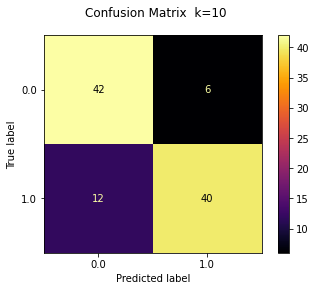

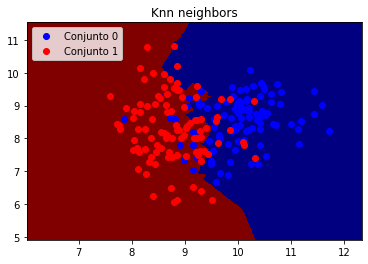

In [ ]:
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)


disp = metrics.plot_confusion_matrix(knn, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix  k=10")
#True Positive Rate
sensibilidad=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,0])

#Positive Predicted Value
presicion=disp.confusion_matrix[0,0]/(disp.confusion_matrix[0,0]+disp.confusion_matrix[0,1])

#Accuracy
exactitud=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])/(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]+disp.confusion_matrix[0,1]+disp.confusion_matrix[1,0])

#False Positive Rate
fall_out=disp.confusion_matrix[0,1]/(disp.confusion_matrix[0,1]+disp.confusion_matrix[1,1])

print('Sensibilidad:', sensibilidad)
print('Presicion:', presicion)
print('Exactitud:', exactitud)
print('Fall_out:', fall_out)




plt.figure()
plt.pcolormesh(xx, yy, z, cmap='jet')
plt.plot(a,b,'bo',label='Conjunto 0')
plt.plot(c,d,'ro',label='Conjunto 1')
plt.legend(loc='upper left')
plt.title('Knn neighbors')
plt.show()

Yo creo que en caso de que la tabla presentara una mayor cantidad de características para la clasificación de las clases a clasificar, se necesitaría definir una forma de distancia, ya que según como se defina, dos vecinos mas cercanos pueden presentar la misma distancia, pero con características de clasificación diferentes, y uno tal vez podría considerar mas un punto que otro según las características.